In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
# datagen=ImageDataGenerator(rescale=(1/255))
train_data,val_data = tf.keras.utils.image_dataset_from_directory(
    'apple',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 2909 files belonging to 4 classes.
Using 2328 files for training.
Using 581 files for validation.


In [34]:
# resize_and_rescale = tf.keras.Sequential([
#   layers.experimental.preprocessing.Resizing(128, 128),
#   layers.experimental.preprocessing.Rescaling(1./255),
# ])
# data_augmentation = tf.keras.Sequential([
#   layers.exper.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.2),
# ])

# train_data = train_data.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'preprocessing'

In [3]:

from keras.applications import ResNet50
conv_base = ResNet50(
           weights = 'imagenet',
           include_top = False,
           input_shape = (128,128,3)
)


# conv_base.Trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False
# for layer in conv_base.layers:
#     print(layer.name , layer.trainable)

out = conv_base.output
out  = GlobalAveragePooling2D()(out)
out = Flatten()(out)
out = Dense(1200, activation='relu')(out)
out = Dropout(0.2)(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(4, activation='softmax')(out)
model = Model(inputs=conv_base.input, outputs=predictions)
# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(512 , activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(Dense(4 , activation = 'softmax'))


In [8]:
# model = Sequential()
# # model.add( BatchNormalization())
# model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# # model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# # model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
# # model.add( BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


# model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# # model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
# # model.add( BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# # model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# # model.add( BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# # model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# # model.add( BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


# # model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=512,activation='relu' ))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(units=256,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.1))
# model.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [4]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 63,527,476 (242.34 MB)

 Trainable params: 63,474,356 (242.14 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [7]:
history  = model.fit(x = train_data , validation_data = val_data , epochs =5,callbacks=[early_stopping])

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.8401 - loss: 0.5327 - val_accuracy: 0.9466 - val_loss: 0.2770
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.9885 - loss: 0.0332 - val_accuracy: 0.9862 - val_loss: 0.0367
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9881 - loss: 0.0603 - val_accuracy: 0.9828 - val_loss: 0.0490
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.9946 - loss: 0.0203 - val_accuracy: 0.9914 - val_loss: 0.0223
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9985 - loss: 0.0025 - val_accuracy: 0.9931 - val_loss: 0.0193


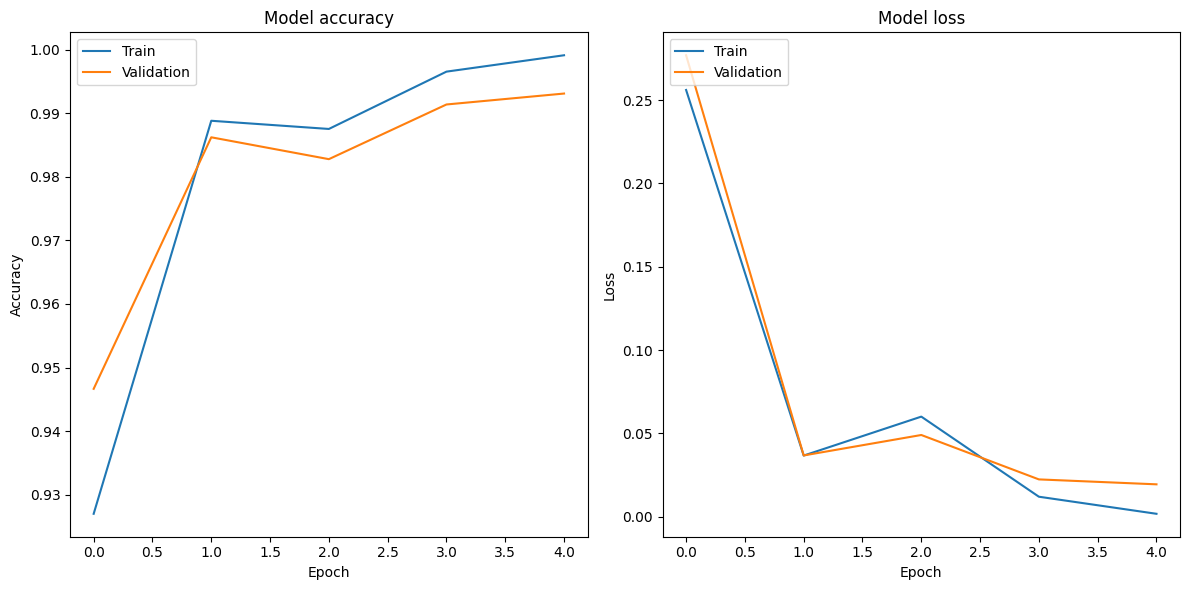

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
model.evaluate(val_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 933ms/step - accuracy: 0.9994 - loss: 0.0034


[0.006033604498952627, 0.9984227418899536]

In [9]:
model.save("apple_model.keras")

In [10]:
import json
with open("appel_hist01.json","w") as f:
    json.dump(history.history , f)

In [11]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']